In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import sklearn.tree as tree

# Loading Data

Terdapat 2 dataset yang dipilih yaitu dataset yang memiliki 20 input dan 17 input. Data dengan 17 input merupakan data yang belum diperbarui. Sampel masing-masing data diperoleh dari pemilihan secara acak sebesar 10% dari data keseluruhan

### Dataset bank-additional-full

In [4]:
# dataset pertama
bank_add= pd.read_csv('bank-additional-full.csv', sep=';')

In [5]:
# Menampilkan 5 Dataset pertama pada dataset 'bank-additional-full.csv'
bank_add.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# Melihat Jumlah dimensi dataset
bank_add.shape

(41188, 21)

### Dataset bank-full

In [7]:
#dataset kedua
bank= pd.read_csv('bank-full.csv', sep=';')

In [8]:
# Menampilkan 5 Dataset pertama pada dataset 'bank-full.csv'
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
# Melihat Jumlah dimensi dataset
bank.shape

(45211, 17)

#### DATA YANG AKAN DIGUNAKAN

Data yang digunakan adalah data bank-additional-full karena data tersebut merupakan data terbaru, maka dalam analisis dan modeling memakai data tersebut.

data tersebut juga dijadikan data training model dengan sampel acak 10 %. dataset tersebut juga digunakan sebagai data testing

In [10]:
bank_train= bank_add # data training (populasi)
bank_test= pd.read_csv('bank-additional-full.csv', sep=';') # data testing (sampel)

In [11]:
# Menampilkan informasi tentang data training meliputi jumlah baris, jumlah kolom, tipe data setiap kolom, dan nilai NULL pada setiap kolom.
bank_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
bank_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Pada data train dan test tidak menunjukan adanya nilai NULL dan masing masing kolom berjumlah 41188 baris, semua baris memiliki nilai non-null. pada hasil tersebut terdapat tipe data float yang berjumlah 5, Integer berjumlah 5, dan tipe data object 11

In [13]:
# menampilkan statistik deskriptif
bank_train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [14]:
# menampilkan statistik deskriptif
bank_test.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Pada hasil tersebut menampilkan jumlah count, mean, std, min,..., max dari setiap kolomnya

### Data Cleaning

In [15]:
bank_train.duplicated().sum()

12

In [16]:
bank_test.duplicated().sum()

12

Pada data train dan test terdapat 12 data duplikasi, sehingga harus dilakukan penghapusan baris duplikat.

In [17]:
dup_rows= bank_train[bank_train.duplicated()]
dup_rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [18]:
# menghapus baris duplikat
bank_train= bank_train.drop_duplicates(keep='first')

In [19]:
# Menampilkan data duplikasi
dup_rows2= bank_test[bank_test.duplicated()]
dup_rows2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [20]:
# menghapus baris duplikat
bank_test= bank_test.drop_duplicates(keep='first')

In [ ]:
bank_train.duplicated().sum()

In [ ]:
bank_test.duplicated().sum()

### Missing Value

In [21]:
bank_train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [22]:
bank_test.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Pada data train dan test tidak ada missing value

### Mengelompokan Kolom berdasarkan Tipe

In [23]:
kategorik=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerik= ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
boolean= ['y']
feature=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

### Visualization

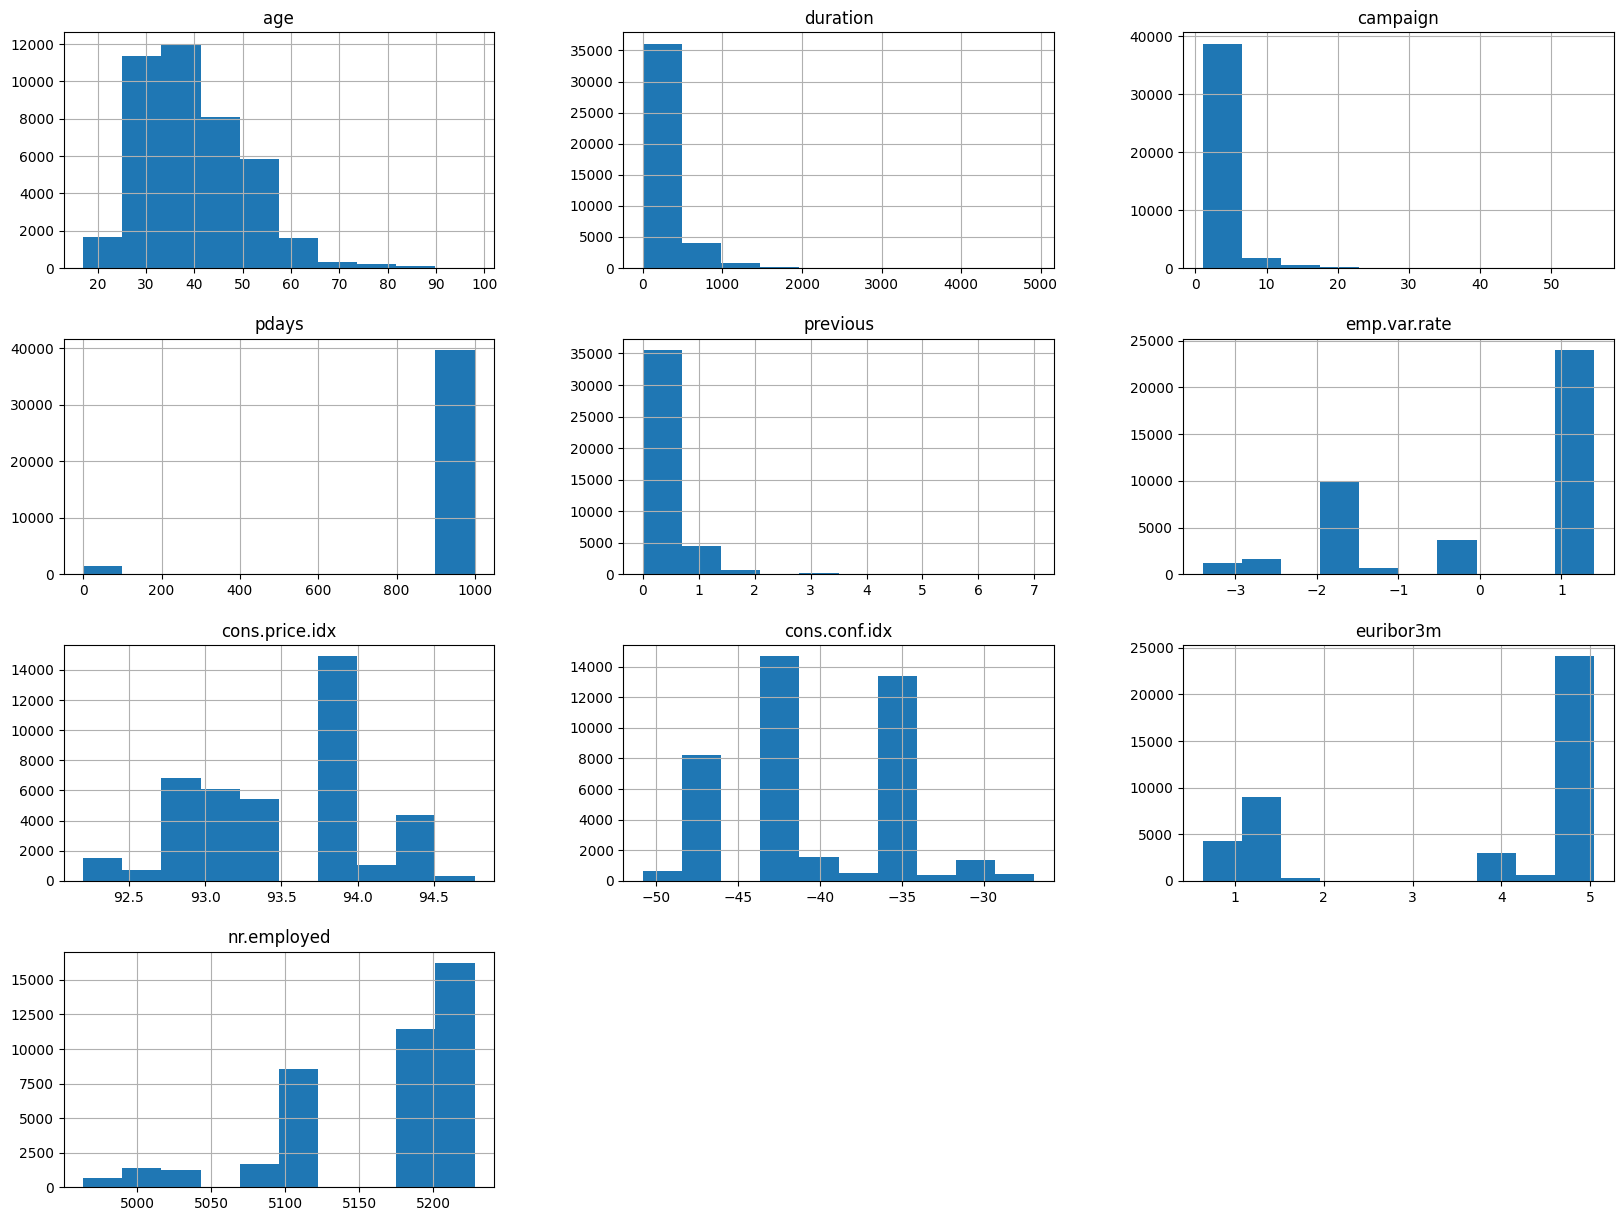

In [24]:
bank_add.hist(figsize=(20,15));
plt.savefig("hist_dist.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Terlihat bahwa data numerik pada dataset tidak berdistribusi normal

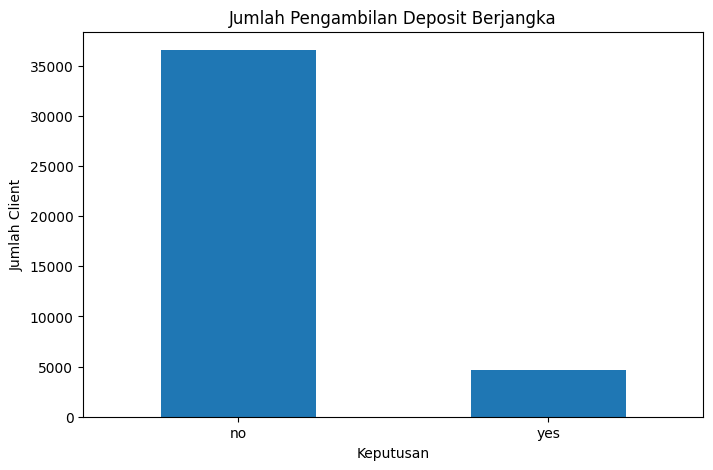

In [25]:
bank_add["y"].value_counts().plot(kind="bar", figsize=(8,5))
plt.xticks(rotation=0)
plt.title("Jumlah Pengambilan Deposit Berjangka")
plt.ylabel("Jumlah Client")
plt.xlabel("Keputusan")
plt.show()

Diagram batang tersbut menunjukkan bahwa banyak client yang tidak mengambil deposit berjangka. Hal tersebut berarti marketing gagal

### Data Preprocessing

In [26]:
pd.options.mode.chained_assignment = None  # default='warn'

In [27]:
# Transform data kategork menjadi numerik
le = preprocessing.LabelEncoder()

for col in kategorik:
    bank_train[col] = le.fit_transform(bank_train[col])
    bank_test[col] = le.fit_transform(bank_test[col])

In [28]:
# Transform data boolean menjadi numerik
for col in boolean:
    bank_train[col] = le.fit_transform(bank_train[col])
    bank_test[col] = le.fit_transform(bank_test[col])

In [29]:
bank_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [30]:
bank_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [31]:
# Menentukan x_train and y_train
x_bank_array = bank_train[feature].to_numpy()
x_train = x_bank_array

y_bank_array = bank_train['y'].astype('int')
y_bank_array= y_bank_array.to_numpy()
y_train = y_bank_array

In [32]:
# Menentukan x_test and y_test
x_bank_array = bank_test[feature].to_numpy()
x_test = x_bank_array

y_bank_array = bank_test['y'].astype('int')
y_bank_array = y_bank_array.to_numpy()
y_test = y_bank_array

In [33]:
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)

### Data Modelling

Logistic Regression

In [34]:
# Inisialisasi model
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Training model
model.fit(x_train, y_train)

# Prediksi
y_pred = model.predict(x_test)

In [35]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.910166116184185


In [36]:
# Evaluasi model
print(confusion_matrix(y_test, y_pred))

[[35588   949]
 [ 2750  1889]]


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     36537
           1       0.67      0.41      0.51      4639

    accuracy                           0.91     41176
   macro avg       0.80      0.69      0.73     41176
weighted avg       0.90      0.91      0.90     41176



Pada Logistic Regression memiliki nilai accuracy sebesar 0.910.

### K-Nearest Neighbors

In [38]:
# Inisialisasi model KNN
knn_model = KNeighborsClassifier(n_neighbors=3)  # Sesuaikan jumlah tetangga (n_neighbors) sesuai kebutuhan

# Training model KNN
knn_model.fit(x_train, y_train)

# Prediksi
knn_pred = knn_model.predict(x_test)

# Evaluasi model KNN
accuracy = metrics.accuracy_score(y_test, knn_pred)
print(f'Accuracy (KNN): {accuracy}')

Accuracy (KNN): 0.9404264620167088


In [39]:
confusion_matrix(y_test, knn_pred)

array([[35791,   746],
       [ 1707,  2932]], dtype=int64)

Pada K-Nearest Neighbors memiliki nilai accuracy sebesar 0.940.

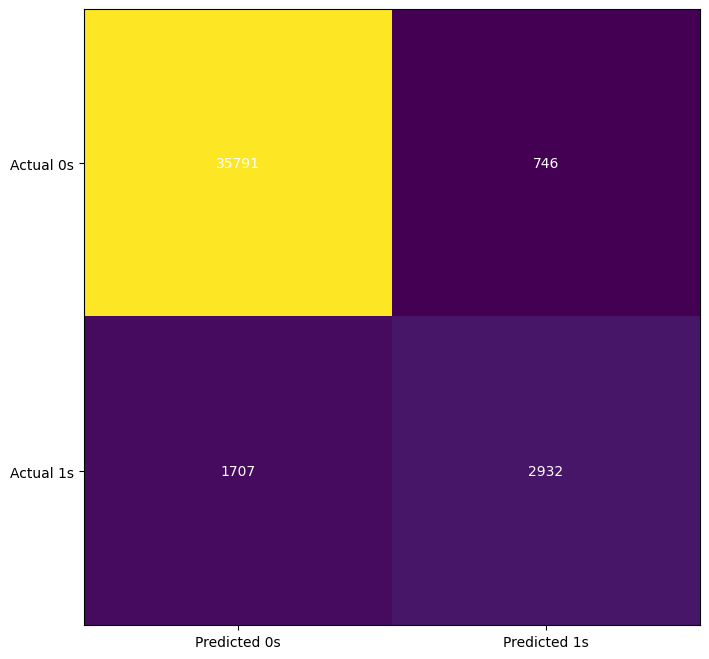

In [40]:
matriks = confusion_matrix(y_test, knn_pred)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(matriks)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matriks[i, j], ha='center', va='center', color='white')
plt.show()

In [41]:
error= []

# menghitung error dari nilai K antara 1 sampai 40
for i in range(1, 40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i= knn.predict(x_test)
    error.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Error mean')

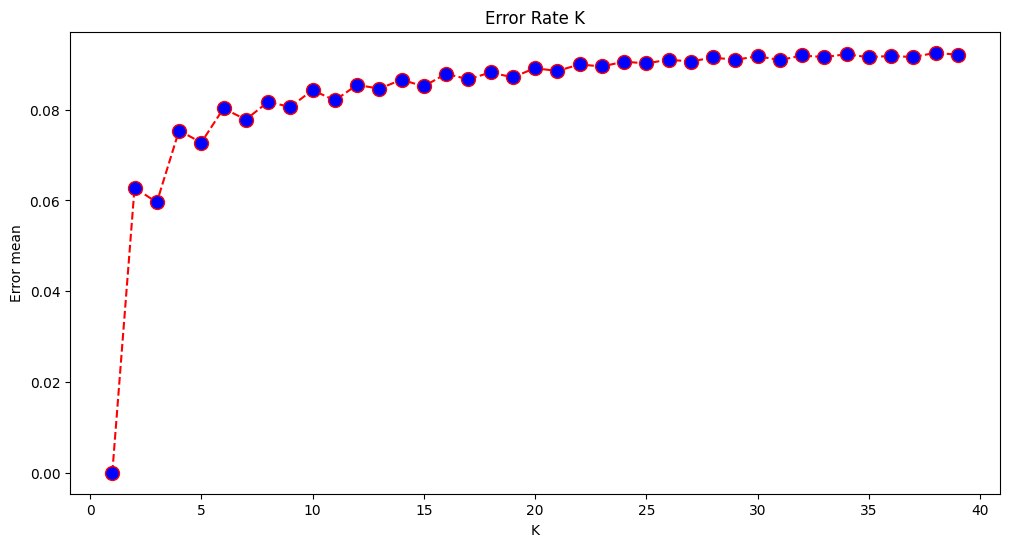

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

### SVM

In [43]:
svm_model = svm.SVC(kernel='linear')  # Pilih kernel sesuai kebutuhan (linear, rbf, dll.)

# Training model SVM
svm_model.fit(x_train, y_train)

# Prediksi
svm_pred = svm_model.predict(x_test)

# Evaluasi model SVM
accuracy_svm = metrics.accuracy_score(y_test, svm_pred)
print(f'Accuracy (SVM): {accuracy_svm}')

Accuracy (SVM): 0.9023945987954148


Pada SVM memiliki nilai accuracy sebesar 0.902.

### Decision Tree

In [44]:
clf= DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_predict4= clf.predict(x_test)

In [45]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predict4))

Accuracy: 1.0


In [46]:
# optimalisasi performa Decision Tree
clf= DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(x_train, y_train)
y_predict4a= clf.predict(x_test)

In [47]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predict4a))

Accuracy: 0.9028560326403731


Accuracy dari decision tree adalah 1.0

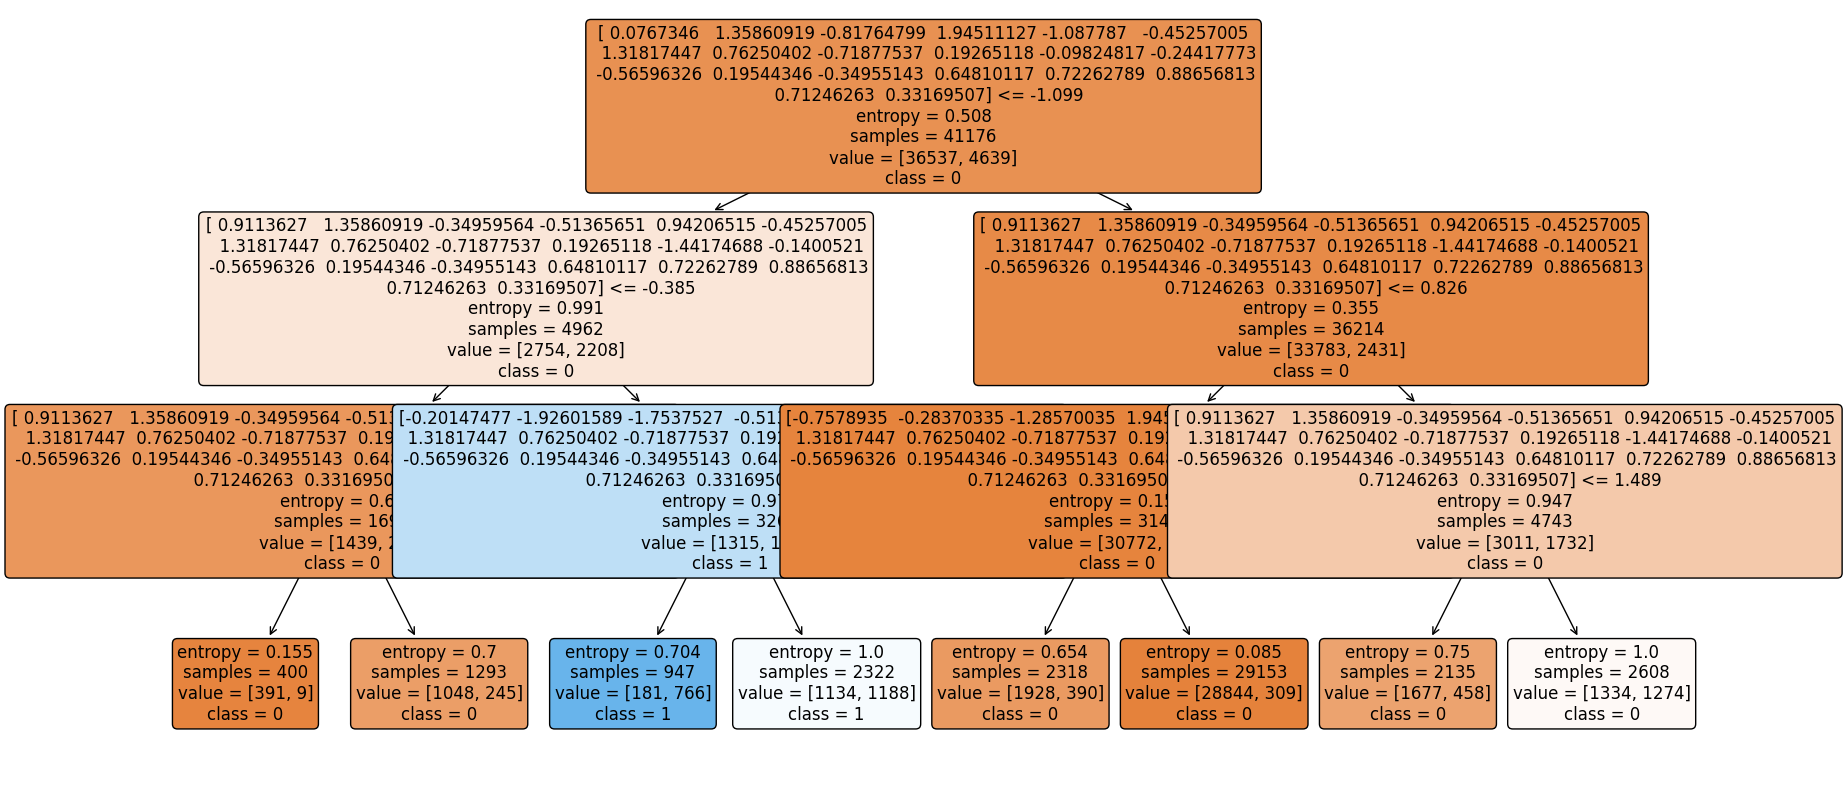

In [48]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, 
               filled=True, rounded=True, 
               feature_names = x_train,
               class_names = ['0','1'],
               fontsize=12)
plt.show()

### Random Forest

In [49]:
rf= RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
y_predict5= rf.predict(x_test)

In [50]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predict5))

Accuracy: 0.9999514280163202


In [51]:
# menemukan important features
feature_imp=pd.Series(rf.feature_importances_, index=feature).sort_values(ascending=False)
feature_imp

duration          0.320772
euribor3m         0.109284
age               0.091357
nr.employed       0.062881
job               0.048619
education         0.043587
campaign          0.043010
day_of_week       0.039784
pdays             0.034699
poutcome          0.026332
cons.conf.idx     0.025418
emp.var.rate      0.025108
marital           0.023896
cons.price.idx    0.022512
housing           0.020034
month             0.016693
loan              0.014640
previous          0.013242
contact           0.009621
default           0.008511
dtype: float64

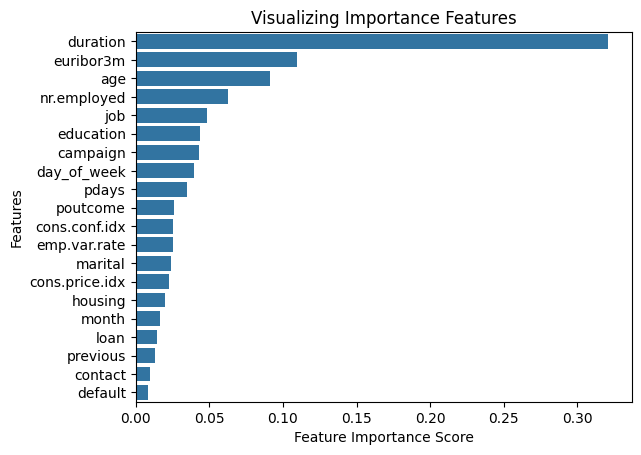

In [52]:
# visualisasi feature importance
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Importance Features")
plt.show()

### Naive Bayes

In [53]:
gnb= GaussianNB()
gnb.fit(x_train, y_train)
y_predict6= gnb.predict(x_test)

In [54]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predict6))

Accuracy: 0.8465611035554692


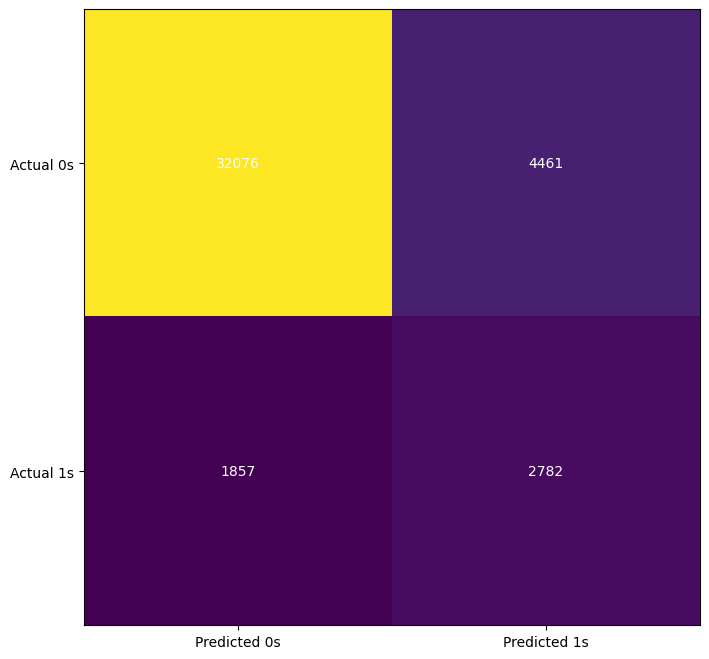

In [55]:
matri = confusion_matrix(y_test, y_predict6)

fig, ax= plt.subplots(figsize=(8,8))
ax.imshow(matri)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matri[i, j], ha='center', va='center', color='white')
plt.show()

### Model Evaluation

In [56]:
print("Logistic Regression:",  metrics.accuracy_score(y_test, y_pred))
print("KNN:", metrics.accuracy_score(y_test, knn_pred))
print("SVM:", metrics.accuracy_score(y_test, svm_pred))
print("Decision Tree:", metrics.accuracy_score(y_test, y_predict4))
print("Random Forest:", metrics.accuracy_score(y_test, y_predict5))
print("Naive Bayes:", metrics.accuracy_score(y_test, y_predict6))

Logistic Regression: 0.910166116184185
KNN: 0.9404264620167088
SVM: 0.9023945987954148
Decision Tree: 1.0
Random Forest: 0.9999514280163202
Naive Bayes: 0.8465611035554692


## KESIMPULAN

hasil analisis yang diperoleh, dapat disimpulkan bahwa :

- Dataset tidak memiliki missing value tetapi memiliki baris duplikat yang harus dihapus
- Dataset menunjukkan bahwa banyak client yang memutuskan untuk tidak mengambil deposit berjangka
- Algritma KNN dan Random Forest memiliki akurasi 1.0 tetapi KNN lebih baik digunakan karena tidak ada feature yang dihilangkan.